## Autoencoder

In [1]:
import torch
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from datasets import MyMNIST, NoisyMNIST
from models.autoencoder import Autoencoder

DEVICE = "mps" if torch.backends.mps.is_available() else "cpu"
BATCH_SIZE = 1024
LR = 3e-1
MOMENTUM = 0.1
NUM_EPOCH = 10

mnist_train = NoisyMNIST(root = "./data/", train = True, download = True)
mnist_test = NoisyMNIST(root = "./data/", train = False, download = True)

mnist_train = DataLoader(mnist_train, batch_size = BATCH_SIZE, shuffle = True, num_workers = 8)
mnist_test = DataLoader(mnist_test, batch_size = BATCH_SIZE, shuffle = False, num_workers = 8)

model = Autoencoder()
model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum = MOMENTUM)

losses = []
for epoch in range(1, NUM_EPOCH + 1):
    model.train()
    training_loss = 0

    n_batches = len(mnist_train)
    progbar = tqdm(range(n_batches), total=n_batches)
    progbar.set_description(f"Epoch [{epoch} / {NUM_EPOCH}]")
    for data, target, _ in mnist_train:
        optimizer.zero_grad()
        data, target = data.to(DEVICE), target.to(DEVICE)
        
        outputs = model(data)
        loss = model.loss_function(outputs, target, loss_type = "binary")['loss']
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        progbar.update()
        progbar.set_postfix(train_loss=f"{loss.item():.4f}")
    
    losses.append(round(training_loss, 4))

Epoch [9 / 10]: 100%|██████████| 59/59 [00:02<00:00, 20.06it/s, train_loss=0.1299]


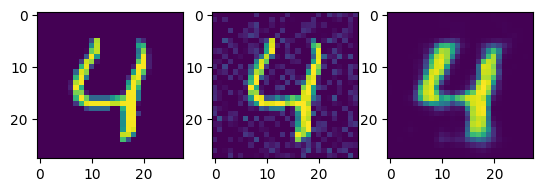

In [11]:
import matplotlib.pyplot as plt

x_hat = mnist_test.dataset[4][0]
x = mnist_test.dataset[4][1]
y = model(x.unsqueeze(0).to(DEVICE)).squeeze(0).cpu().detach()

f, axarr = plt.subplots(1, 3)
axarr[0].imshow(x)
axarr[1].imshow(x_hat)
axarr[2].imshow(y)